In [1]:
import scipy.special as SSp
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import scipy.ndimage
from scipy import fftpack
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
def gaussianizepdf(denf,avgrepeats=True, sigmagauss = None,assumelognormal=True):
    denshape = denf.shape
    denff = denf.flatten()
    o_f = np.argsort(denff)
    gaussf = 0.*denff.astype(np.float)
    lenny = len(gaussf)

    if (sigmagauss == None):
        if assumelognormal:
            sigmagauss = np.sqrt(np.log1p(np.var(denff)))
        else:
            sigmagauss = np.std(denff)
    print(sigmagauss)

    step = 1./lenny

    gaussf[o_f] = np.sqrt(2.)*sigmagauss*SSp.erfinv(2.*np.arange(0.5*step,1,step)-1.)

    # average together repeated elements
    if (avgrepeats):
        cuts = np.searchsorted(denff[o_f],np.unique(denff[o_f]))
        print(len(cuts),'cuts')
        for i in range(len(cuts)-1):
            gaussf[o_f[cuts[i]:cuts[i+1]]] = np.mean(gaussf[o_f[cuts[i]:cuts[i+1]]])
        # get the last one
        gaussf[o_f[cuts[-1]:]]=np.mean(gaussf[o_f[cuts[-1]:]])

    gaussf = gaussf.reshape(denshape)

    return gaussf

In [3]:
image_data = fits.open('file:///C:/cygwin64/home/rehg98/WLconv_z2.00_0001r.fits')[0].data.astype(float)

In [6]:
image_data_1 = scipy.ndimage.filters.gaussian_filter(image_data, 9.75)
image_data_2 = scipy.ndimage.filters.gaussian_filter(image_data, 19.5)
image_data_5 = scipy.ndimage.filters.gaussian_filter(image_data, 48.76)
image_data_10 = scipy.ndimage.filters.gaussian_filter(image_data, 97.5)

In [7]:
gauss_data_1 = gaussianizepdf(image_data_1)
gauss_data_2 = gaussianizepdf(image_data_2)
gauss_data_5 = gaussianizepdf(image_data_5)
gauss_data_10 = gaussianizepdf(image_data_10)

0.019041307205
4194304 cuts
0.0145214172759
4194304 cuts
0.010027197488
4194304 cuts
0.00796108464818
4194304 cuts


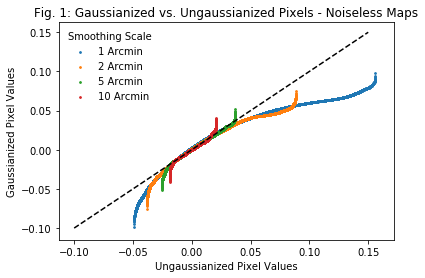

In [12]:
plt.figure()
plt.scatter(image_data_1.flatten(), gauss_data_1.flatten(), s=3, label = "1 Arcmin")
plt.scatter(image_data_2.flatten(), gauss_data_2.flatten(), s=3, label = "2 Arcmin")
plt.scatter(image_data_5.flatten(), gauss_data_5.flatten(), s=3, label = "5 Arcmin")
plt.scatter(image_data_10.flatten(), gauss_data_10.flatten(), s=3, label = "10 Arcmin")
plt.plot([-0.1, 0.15], [-0.1, 0.15], "k--")

plt.title("Fig. 1: Gaussianized vs. Ungaussianized Pixels - Noiseless Maps")
plt.xlabel("Ungaussianized Pixel Values")
plt.ylabel("Gaussianized Pixel Values")
plt.legend(frameon = 0, fontsize = 10, title = "Smoothing Scale")
plt.show()

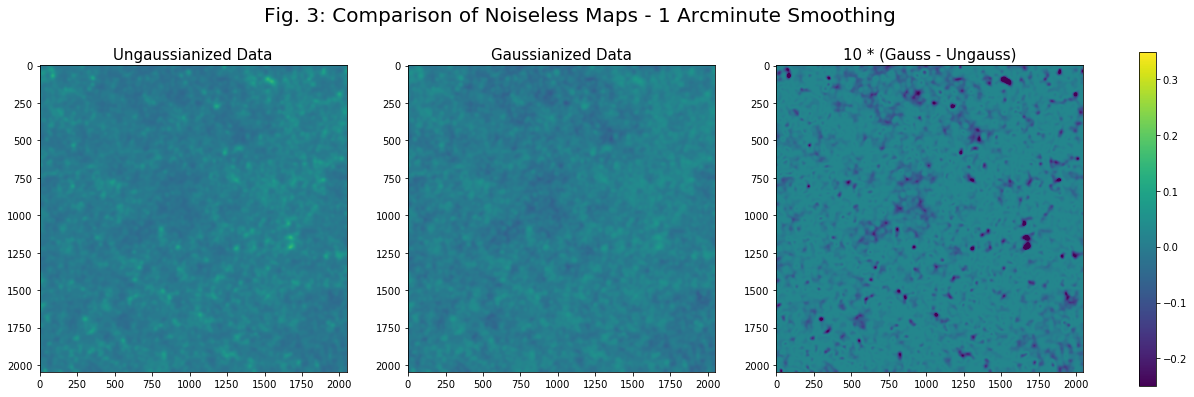

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize = (20, 20))
axlist = [ax1, ax2, ax3]

fig.suptitle("Fig. 3: Comparison of Noiseless Maps - 1 Arcminute Smoothing", y = 0.65, fontsize = "20")
#plt.subplot(1, 3, 1)
first = ax1.imshow(image_data_1, vmin = -0.25, vmax = 0.35)
ax1.set_title('Ungaussianized Data', fontsize = "15")


#plt.subplot(1, 3, 2)
#plt.figure(figsize = (2, 2))
ax2.imshow(gauss_data_1, vmin = -0.25, vmax = 0.35)
ax2.set_title('Gaussianized Data', fontsize = "15")


#plt.subplot(1, 3, 3)
#plt.figure(figsize = (2, 2))
ax3.imshow(10 * (gauss_data_1 - image_data_1), vmin = -0.25, vmax = 0.35)
ax3.set_title('10 * (Gauss - Ungauss)', fontsize = "15")

fig.colorbar(first, ax=axlist, fraction=0.015)

#plt.subplots_adjust(wspace=1)
#plt.tight_layout()
plt.show()

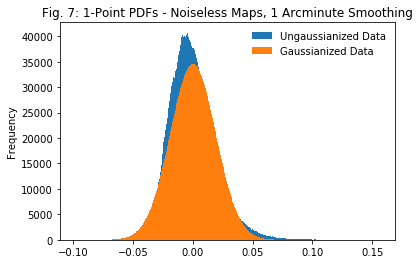

In [13]:
NBINS = 500
plt.hist(image_data_1.flatten(), NBINS, label = "Ungaussianized Data")
plt.hist(gauss_data_1.flatten(), NBINS, label = "Gaussianized Data")
plt.title("Fig. 7: 1-Point PDFs - Noiseless Maps, 1 Arcminute Smoothing")
#plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.legend(frameon = 0, fontsize = 10)
plt.show()